First 5 rows of data:
   Customer ID  Age  Gender     Income  Purchase Frequency  \
0            1   24    Male   532999.5                 1.0   
1            2   30  Female   778999.5                 2.5   
2            3   22    Male   286999.5                 5.0   
3            4   35  Female  1065999.5                 2.5   
4            5   28    Male   532999.5                 2.5   

   Average Purchase Amount          Product Categories Purchased  
0                     3000                  Men's wear, Footwear  
1                     9500  Women's wear, Accessories, Kids Wear  
2                     1300       Footwear, Kids' wear, Mens wear  
3                     7500             Women's wear, Accessories  
4                     3500                  Men's wear, Footwear  

Clustered Data (first 5 rows):
   Customer ID  Age  Gender     Income  Purchase Frequency  \
0            1   24    Male   532999.5                 1.0   
1            2   30  Female   778999.5         

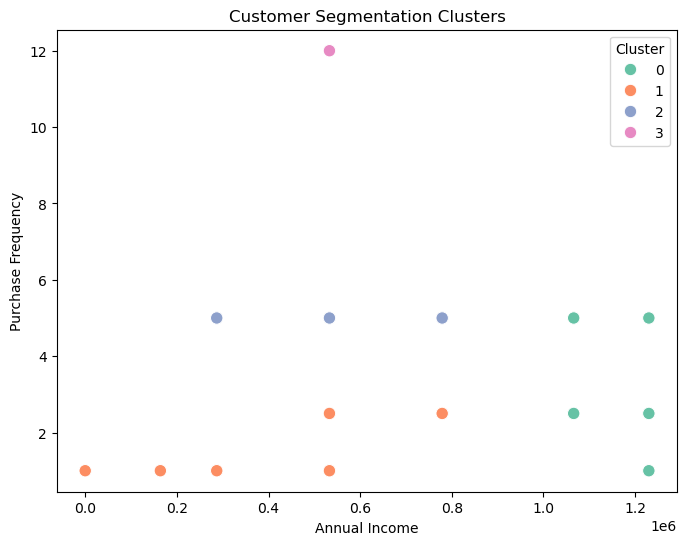


Cluster Profiles:
               Age        Income  Purchase Frequency
Cluster                                             
0        37.666667  1.072833e+06                3.00
1        27.318182  5.255450e+05                1.75
2        27.714286  5.329995e+05                5.00
3        26.000000  5.329995e+05               12.00


In [42]:
# ----------------------------
# Step 1: Import Libraries
# ----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ----------------------------
# Step 2: Load Dataset
# ----------------------------
# Load your Excel dataset
df = pd.read_excel("Book1.xlsx")

# Preview first few rows
print("First 5 rows of data:")
print(df.head())

# ----------------------------
# Step 3: Select Features for Clustering
# ----------------------------
# Let's pick Age, Annual Income, and Purchase Frequency
X = df[['Age', 'Income', 'Purchase Frequency']]

# ----------------------------
# Step 4: Standardize Data
# ----------------------------
# Scaling is important for clustering (so one feature doesn't dominate)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------
# Step 5: Apply K-Means Clustering
# ----------------------------
kmeans = KMeans(n_clusters=4, random_state=42)  # choose 4 clusters for example
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("\nClustered Data (first 5 rows):")
print(df.head())

# ----------------------------
# Step 6: Visualize Clusters
# ----------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Income'], y=df['Purchase Frequency'],
                hue=df['Cluster'], palette='Set2', s=80)
plt.title("Customer Segmentation Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Purchase Frequency")
plt.legend(title="Cluster")
plt.show()

# ----------------------------
# Step 7: Analyze Cluster Profiles
# ----------------------------
cluster_summary = df.groupby('Cluster')[['Age', 'Income', 'Purchase Frequency']].mean()
print("\nCluster Profiles:")
print(cluster_summary)